# DMGs for hypoxia and control treatments 
All the oysters included in this analysis have experienced hypoxia or control treatments for either phase 1 and/or phase 2. No other treatments (both, warm) are included in this analysis.

#### 08/27/2024
futher investigating DESeq results based on notes from SGW 

first, loading in the dataframes originally generated in deseq_analysis.ipynb that are needed for DESeq
- these would include the counts matrix and meta data

In [1]:
# loading required packages
library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)
library(dplyr)
library(ggh4x)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’

In [2]:
counts <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/counts_formatted.csv')
head(counts)

,X,BBB.WBO.B21,BBB.WBV.B70,BBO.BBO.B16,BBO.BBY.B27,BBO.WBO.B16,BBO.WBV.B64,BBR.BBB.B50,BBR.BBG.B38,BBR.BBY.B26,⋯,WBR.BBY.W25,WBV.WBO.W23,WBV.WBR.W12,WBY.BBV.W65,WBY.BBY.W30,WPB.BPG.G45,WPO.BPO.G16,WPO.BPY.G28,WPR.BPY.G25,WPV.BPR.G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111120752,2,2,0,0,2,0,0,0,1,⋯,0,0,0,0,1,0,0,1,1,0
2,LOC111109452,0,0,0,0,1,1,10,12,0,⋯,0,1,0,1,2,15,0,0,3,0
3,LOC111124802,597,453,408,244,502,434,187,336,311,⋯,122,120,57,289,202,168,134,86,252,9
4,LOC111101273,173,146,115,75,171,158,64,115,137,⋯,43,45,18,87,81,71,52,38,73,1
5,LOC111101250,253,255,257,118,327,269,115,141,184,⋯,91,96,24,254,109,92,49,5,101,2
6,LOC111101262,645,634,502,364,647,677,246,389,355,⋯,184,146,52,387,251,188,131,78,283,12


In [3]:
# removing the extra info from the file name
cleaned_column_names <- gsub("^X2018\\.\\.", "", gsub("\\.CV_alignment\\.sam$", "", colnames(counts)))
head(cleaned_column_names)

# replace the '.' with '-'
cleaned_column_names2 <- gsub('\\.', "-", cleaned_column_names)
head(cleaned_column_names2)

# now assigning to the columns
colnames(counts) = cleaned_column_names2
head(counts)

[1] "X"           "BBB.WBO.B21" "BBB.WBV.B70" "BBO.BBO.B16" "BBO.BBY.B27"
[6] "BBO.WBO.B16"

[1] "X"           "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27"
[6] "BBO-WBO-B16"

,X,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111120752,2,2,0,0,2,0,0,0,1,⋯,0,0,0,0,1,0,0,1,1,0
2,LOC111109452,0,0,0,0,1,1,10,12,0,⋯,0,1,0,1,2,15,0,0,3,0
3,LOC111124802,597,453,408,244,502,434,187,336,311,⋯,122,120,57,289,202,168,134,86,252,9
4,LOC111101273,173,146,115,75,171,158,64,115,137,⋯,43,45,18,87,81,71,52,38,73,1
5,LOC111101250,253,255,257,118,327,269,115,141,184,⋯,91,96,24,254,109,92,49,5,101,2
6,LOC111101262,645,634,502,364,647,677,246,389,355,⋯,184,146,52,387,251,188,131,78,283,12


In [4]:
# setting the gene name as the row name and deleting that column
rownames(counts) <- counts$X
counts2 <- counts[-1]

head(counts2)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,0,0,2,0,0,0,1,0,⋯,0,0,0,0,1,0,0,1,1,0
LOC111109452,0,0,0,0,1,1,10,12,0,2,⋯,0,1,0,1,2,15,0,0,3,0
LOC111124802,597,453,408,244,502,434,187,336,311,110,⋯,122,120,57,289,202,168,134,86,252,9
LOC111101273,173,146,115,75,171,158,64,115,137,45,⋯,43,45,18,87,81,71,52,38,73,1
LOC111101250,253,255,257,118,327,269,115,141,184,49,⋯,91,96,24,254,109,92,49,5,101,2
LOC111101262,645,634,502,364,647,677,246,389,355,108,⋯,184,146,52,387,251,188,131,78,283,12


In [5]:
meta <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE18_meta.csv')

# changing rownames to the unique sample ID
rownames(meta) <- meta$unique_ID

meta$treatment <- paste(meta$Phase1, meta$Phase2, sep = "_")

# pulling out only the rows I need
meta <- select(meta, Phase1, Phase2, treatment)
head(meta)

,Phase1,Phase2,treatment
,<chr>,<chr>,<chr>
BBB-WBO-B21,hypoxic,control,hypoxic_control
BBB-WBV-B70,hypoxic,control,hypoxic_control
BBO-BBO-B16,hypoxic,hypoxic,hypoxic_hypoxic
BBO-BBY-B27,hypoxic,hypoxic,hypoxic_hypoxic
BBO-WBO-B16,hypoxic,control,hypoxic_control
BBO-WBV-B64,hypoxic,control,hypoxic_control


In [6]:
# setting the same order for counts matrix and meta data
counts2 <- counts2[,rownames(meta)]
all(rownames(meta) == colnames(counts2))

[1] TRUE

now ready for analysis

## Making *all* pairwise comparisons
we want to look at all pairwise comparisons, just to get the full picture..

these include:
- control control vs. hypoxic hypoxic
- hypoxic control vs. control hypoxic

In [7]:
# removing warm both and both both samples
meta_filtered <- filter(meta, meta$Phase2 != 'both')

# need to remove them from counts as well
counts_filtered <- counts2[, colnames(counts2) %in% rownames(meta_filtered)]

dim(meta_filtered)
dim(counts_filtered)

[1] 20  3

[1] 13544    20

In [8]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                              colData = meta_filtered, 
                              design = ~ treatment)
dds=DESeq(dds)
resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                                   
[2] "treatment_control_hypoxic_vs_control_control"
[3] "treatment_hypoxic_control_vs_control_control"
[4] "treatment_hypoxic_hypoxic_vs_control_control"

### control control vs. hypoxic hypoxic
CC vs. HH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 2, 0.015%
LFC < -0.25 (down) : 1, 0.0074%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



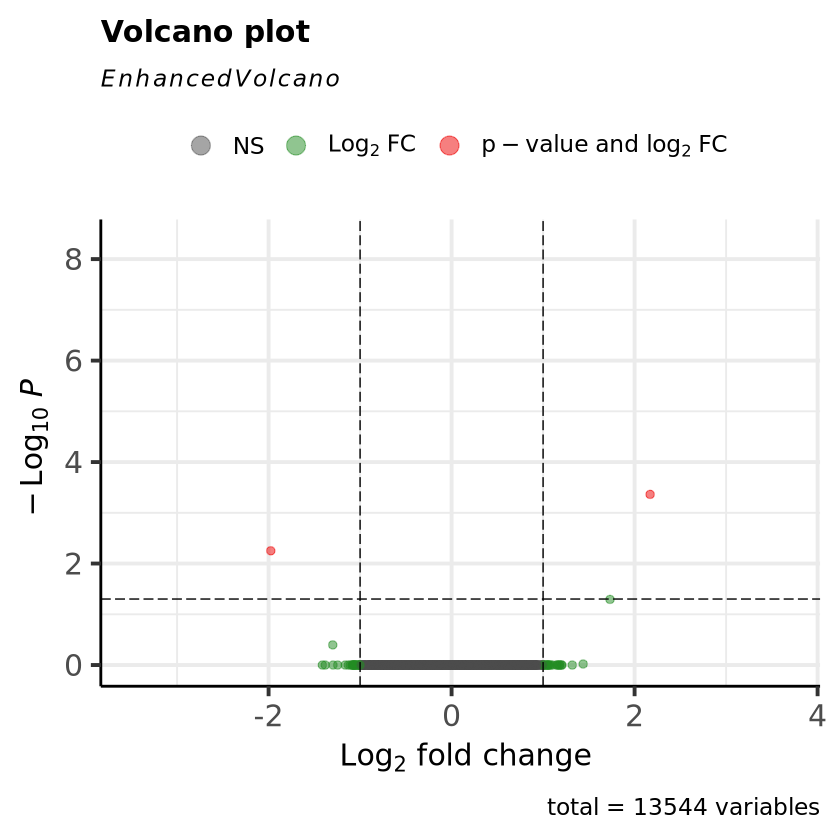

In [9]:
# control control vs. hypoxic hypoxic

contrast2 <- c("treatment", "hypoxic_hypoxic", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls<-lfcShrink(dds, # dds object
                      contrast = contrast2, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls)

EnhancedVolcano(ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

1 DMGs for control control

2 DMGs for hypoxic hypoxic

In [10]:
write.csv(as.data.frame(ls), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HH.csv")

### hypoxic control vs. control control
HC vs. CC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 6, 0.044%
LFC < -0.25 (down) : 24, 0.18%
outliers [1]       : 294, 2.2%
low counts [2]     : 5765, 43%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



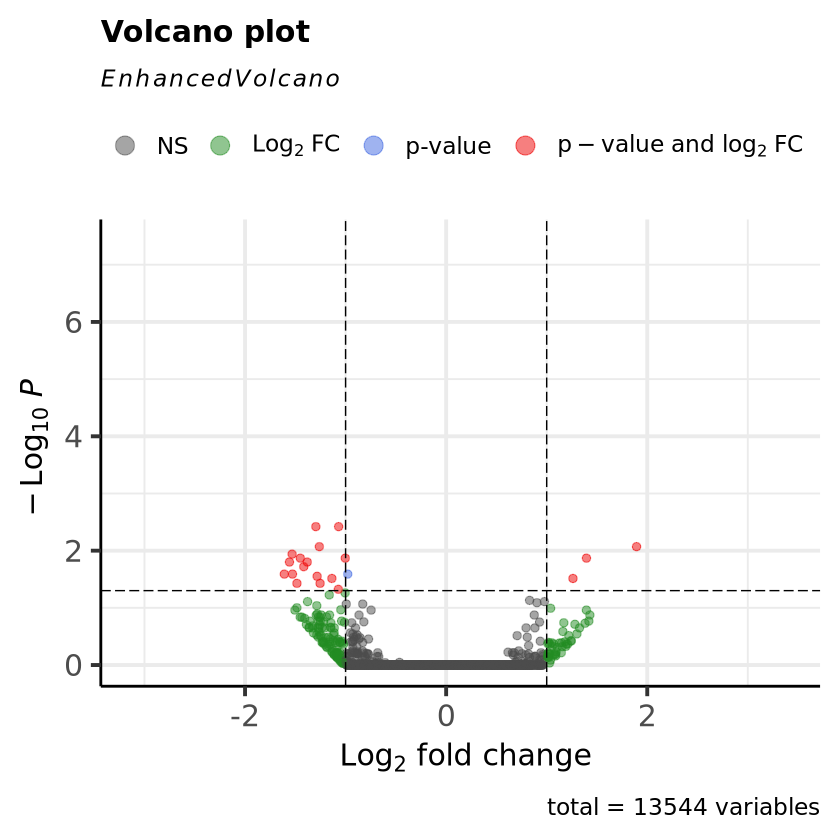

In [11]:
# hypoxic control vs. control control

contrast3 <- c("treatment", "hypoxic_control", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls2<-lfcShrink(dds, # dds object
                      contrast = contrast3, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls2)

EnhancedVolcano(ls2, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

6 DMGs for hypoxic control

24 DMGs for control control

In [12]:
write.csv(as.data.frame(ls2), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv")

### control hypoxic vs. control control
CH vs. CC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 1, 0.0074%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



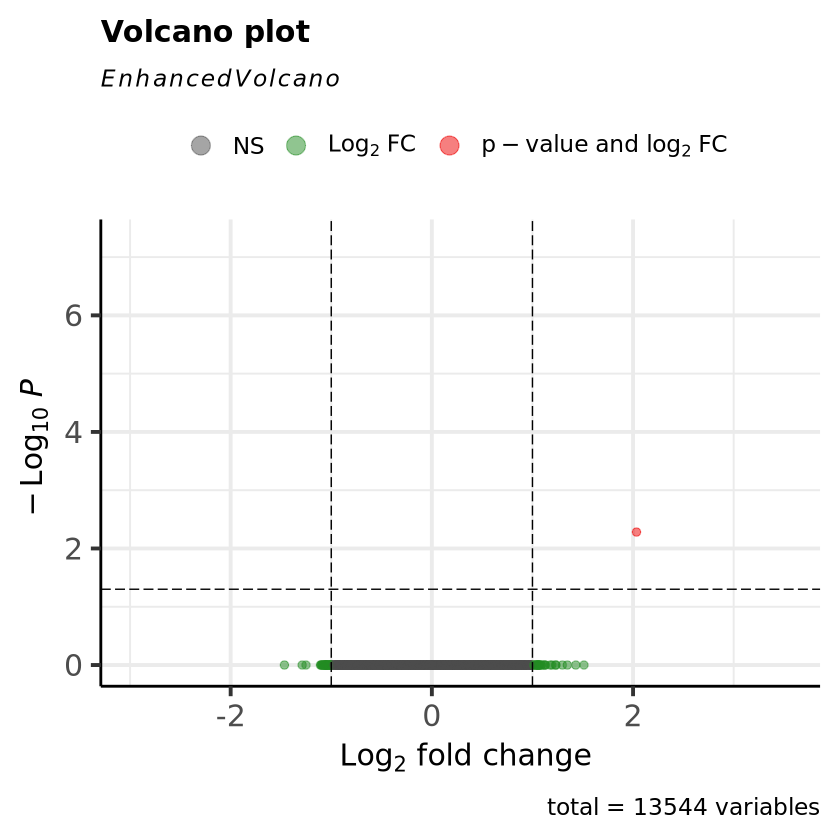

In [13]:
# control hypoxic vs. control control

contrast4 <- c("treatment", "control_hypoxic", "control_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls3<-lfcShrink(dds, # dds object
                      contrast = contrast4, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls3)

EnhancedVolcano(ls3, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

1 DMGs for control hypoxic

0 DMGs for control control

In [14]:
write.csv(as.data.frame(ls3), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_CH.csv")

### hypoxic hypoxic vs. hypoxic control
HH vs. HC

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 136, 1%
LFC < -0.25 (down) : 30, 0.22%
outliers [1]       : 294, 2.2%
low counts [2]     : 4264, 32%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



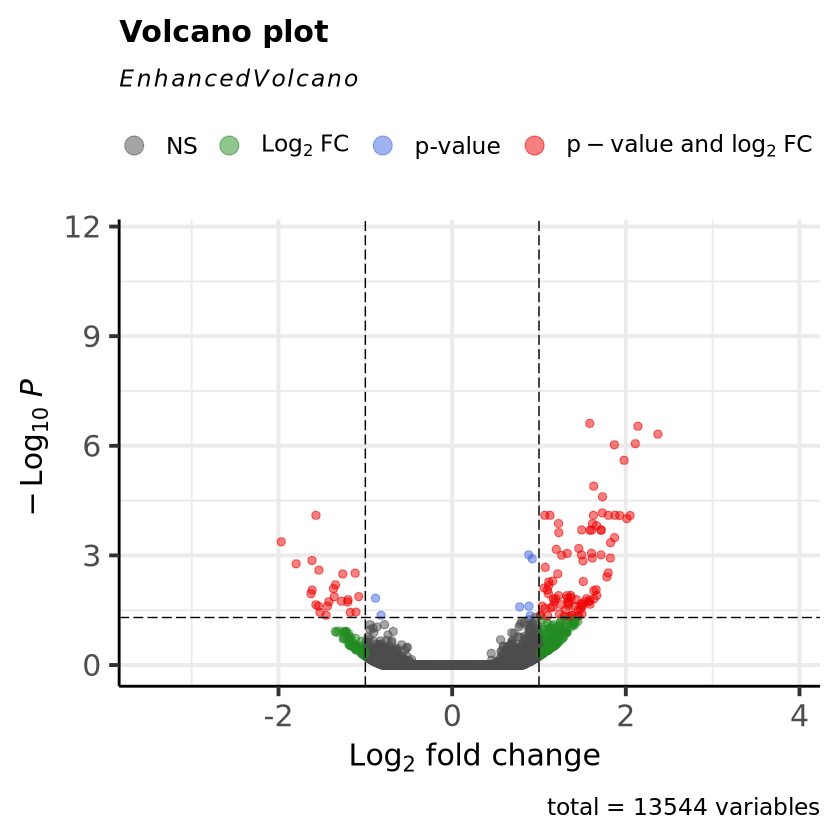

In [15]:
# hypoxic hypoxic vs. hypoxic control

contrast5 <- c("treatment", "hypoxic_hypoxic", "hypoxic_control")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls4<-lfcShrink(dds, # dds object
                      contrast = contrast5, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls4)

EnhancedVolcano(ls4, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

136 DMGs for hypoxic hypoxic

30 DMGs for hypoxic control

In [16]:
write.csv(as.data.frame(ls4), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv")

### hypoxic hypoxic vs. control hypoxic
HH vs. CH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 0, 0%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 294, 2.2%
low counts [2]     : 0, 0%
(mean count < 8)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



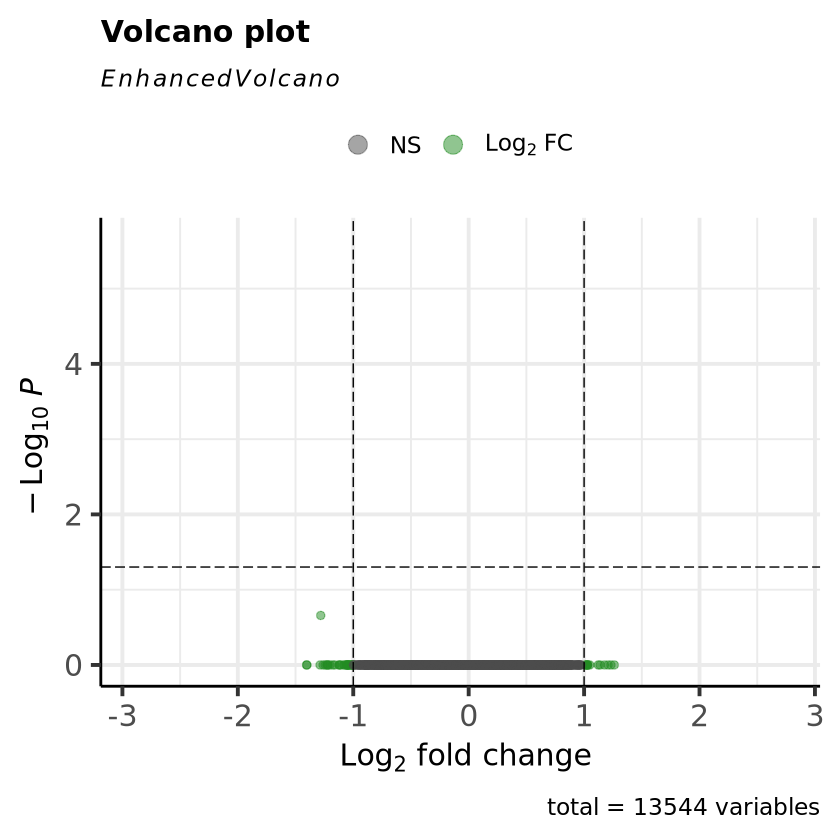

In [17]:
# hypoxic hypoxic vs. control hypoxic

contrast6 <- c("treatment", "hypoxic_hypoxic", "control_hypoxic")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls5<-lfcShrink(dds, # dds object
                      contrast = contrast6, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls5)

EnhancedVolcano(ls5, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

0 DMGs for hypoxic hypoxic

0 DMGs for control hypoxic

In [18]:
write.csv(as.data.frame(ls5), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_CH.csv")

### hypoxic control vs. control hypoxic
HC vs. CH

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13531 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 146, 1.1%
LFC < -0.25 (down) : 241, 1.8%
outliers [1]       : 294, 2.2%
low counts [2]     : 4506, 33%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



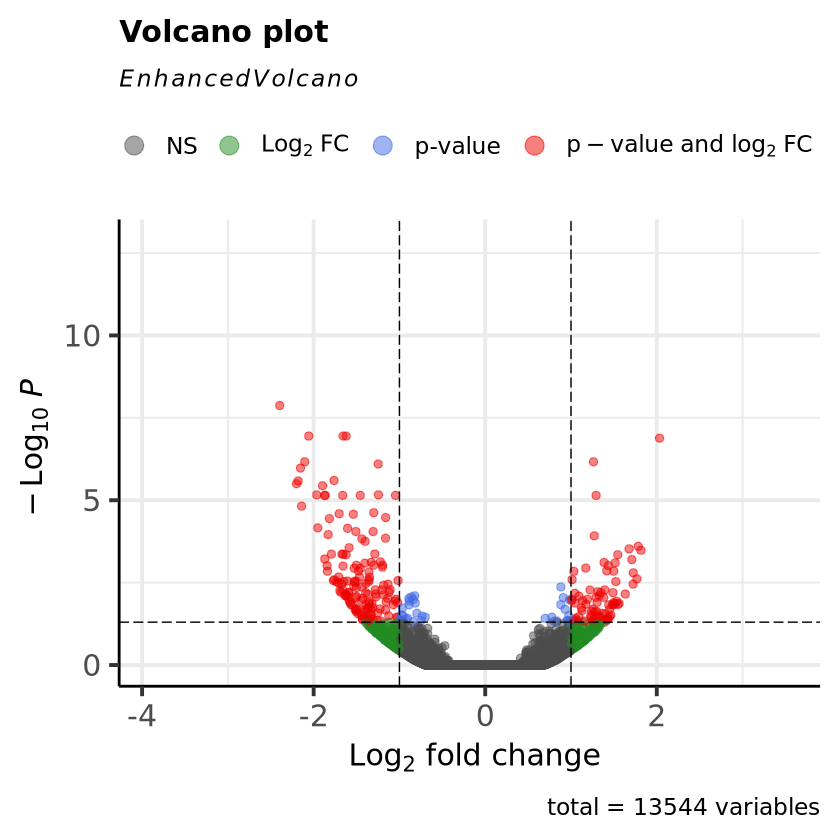

In [19]:
# hypoxic control vs. control hypoxic

contrast9 <- c("treatment", "hypoxic_control", "control_hypoxic")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls6<-lfcShrink(dds, # dds object
                      contrast = contrast9, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls6)

EnhancedVolcano(ls6, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

146 DMGs for hypoxic control

241 DMGs for control hypoxic

so there is a difference in methylation for *when* you experience hypoxic stress

In [20]:
write.csv(as.data.frame(ls6), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv")

### Phase 1 control vs. hypoxic
Cx vs. Hx

In [21]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p1_dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                                 colData = meta_filtered,
                                 design = ~Phase1)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 584 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13508 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 0, 0%
LFC < -0.25 (down) : 0, 0%
outliers [1]       : 561, 4.2%
low counts [2]     : 23, 0.17%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



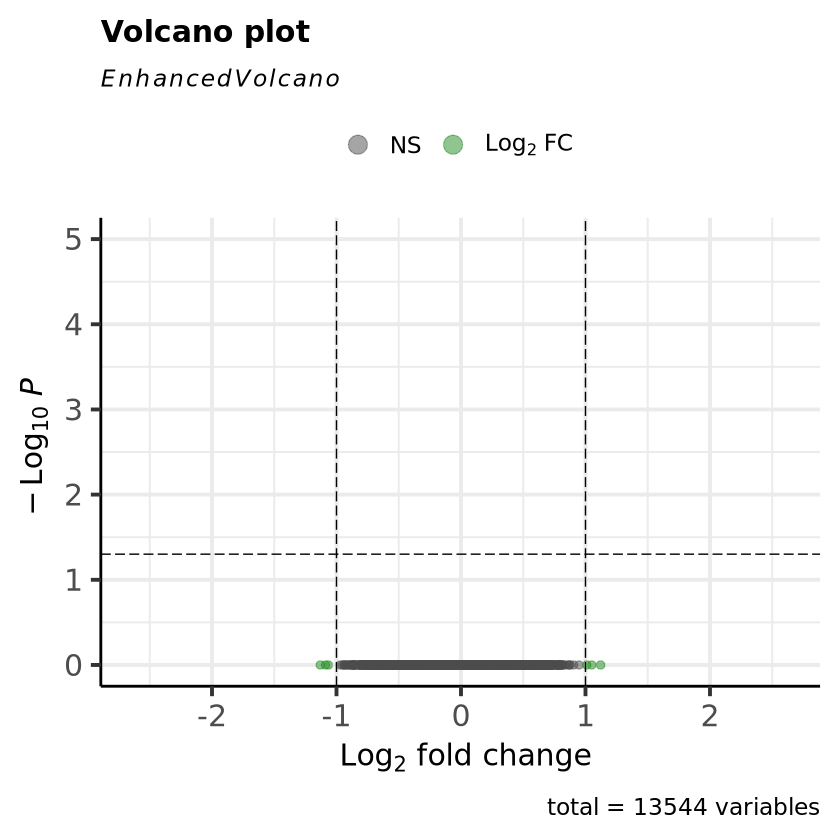

In [22]:
# phase 1 hypoxic vs. control

contrast7 <- c("Phase1", "hypoxic", "control")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls7<-lfcShrink(p1_dds, # dds object
                      contrast = contrast7, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls7)

EnhancedVolcano(ls7, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

0 DMGs for phase 1 hypoxic

0 DMGs for phase 1 control

In [23]:
write.csv(as.data.frame(ls7), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/Hx_vs_Cx.csv")

### Phase 2 control vs. hypoxic
xC vs. xH

In [24]:
# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
p2_dds <- DESeqDataSetFromMatrix(countData = counts_filtered,
                              colData = meta_filtered, 
                              design = ~ Phase2)
p2_dds=DESeq(p2_dds)
resultsNames(p2_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 548 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                 "Phase2_hypoxic_vs_control"

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13499 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 26, 0.19%
LFC < -0.25 (down) : 10, 0.074%
outliers [1]       : 515, 3.8%
low counts [2]     : 2288, 17%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



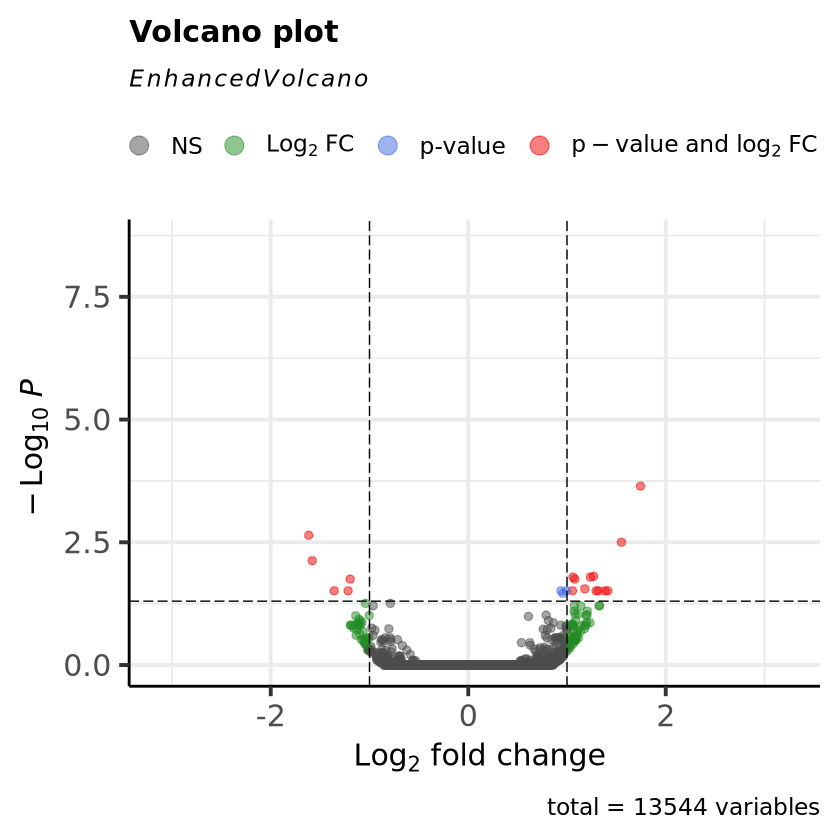

In [25]:
# phase 2 hypoxic vs. control

contrast8 <- c("Phase2", "hypoxic", "control")
# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
ls8<-lfcShrink(p2_dds, # dds object
                      contrast = contrast8, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(ls8)

EnhancedVolcano(ls8, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

26 DMGs for phase 2 hypoxic

10 DMGs for phase 2 control

In [26]:
write.csv(as.data.frame(ls8), "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/xH_vs_xC.csv")

## NMDS Plot
using DESeq2 dds object (which used the argument design=~treatment)

In [27]:
# MDS plot

# normalization & transformation
vsd <- vst(dds)

# calculate sample distances
sample_dists <- assay(vsd) %>%
t() %>%
dist() %>%
as.matrix()

head(sample_dists)

# calculate MDS value from distance matrix
mdsData <- data.frame(cmdscale(sample_dists))
mds <- cbind(mdsData, as.data.frame(colData(vsd))) # combine with sample data
head(mds)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
BBB-WBO-B21,0.00000,18.84577,20.92953,20.96794,18.21364,18.11468,20.63180,19.75147,20.22578,18.92113,19.59980,22.22072,22.99473,25.76891,19.89501,22.74966,21.92330,24.57036,22.87723,22.23458
BBB-WBV-B70,18.84577,0.00000,19.18891,20.44833,18.37856,18.70862,18.49159,19.88195,19.52910,22.14748,19.82340,21.78769,23.04090,27.07967,19.68026,20.36870,21.60692,24.96069,22.56522,21.60935
BBO-BBO-B16,20.92953,19.18891,0.00000,18.48364,18.67343,20.61852,17.09182,17.92361,16.80276,22.11230,19.36438,18.71328,20.35510,27.10422,18.51823,19.93818,19.39514,22.60180,18.58325,18.38694
BBO-BBY-B27,20.96794,20.44833,18.48364,0.00000,20.06915,19.96350,18.48062,18.78633,16.63747,23.02284,19.67587,19.59168,21.10106,26.91646,19.63858,21.92601,21.00382,23.25080,18.86815,17.57746
BBO-WBO-B16,18.21364,18.37856,18.67343,20.06915,0.00000,18.29444,19.18185,19.88428,18.89404,20.74670,18.86631,21.12054,22.26473,26.68688,18.52538,21.98739,20.68327,23.12099,20.82959,20.82289
BBO-WBV-B64,18.11468,18.70862,20.61852,19.96350,18.29444,0.00000,20.41040,20.58917,18.89354,21.39994,17.71932,21.61194,22.00616,25.44915,19.60662,22.17830,22.25292,24.32149,22.19753,21.13937


,X1,X2,Phase1,Phase2,treatment,sizeFactor
,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>
BBB-WBO-B21,-5.843530,-7.9131927,hypoxic,control,hypoxic_control,2.383679
BBB-WBV-B70,-2.252235,-5.9162123,hypoxic,control,hypoxic_control,2.070380
BBO-BBO-B16,3.785809,0.6607293,hypoxic,hypoxic,hypoxic_hypoxic,1.679982
BBO-BBY-B27,2.993232,2.0566212,hypoxic,hypoxic,hypoxic_hypoxic,1.131588
BBO-WBO-B16,-1.893454,-5.7008254,hypoxic,control,hypoxic_control,2.459313
BBO-WBV-B64,-5.037877,-4.4132410,hypoxic,control,hypoxic_control,2.191596


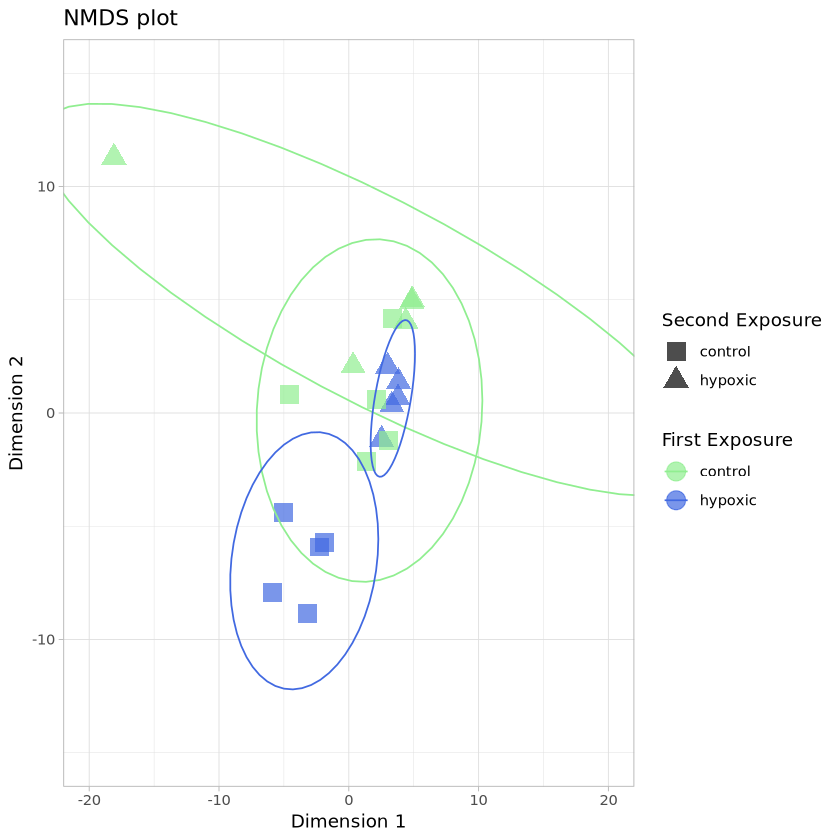

In [28]:
# plot
ggplot(mds, aes(X1, X2, shape = Phase2, col = Phase1)) + 
  geom_point(size = 5, alpha = 0.7) +
scale_shape_manual(values = c(15, 17)) +
coord_cartesian(xlim=c(-20,20), ylim = c(-15,15)) +
scale_color_manual(values = c('lightgreen','royalblue')) +
labs(title = "NMDS plot", x = "Dimension 1", y = "Dimension 2", color = "First Exposure", shape = "Second Exposure") +
stat_ellipse() +
theme_light()

## Heatmap

In [29]:
vsd <- vst(dds)

In [34]:
library(pheatmap)

In [45]:
ntd <- normTransform(dds)

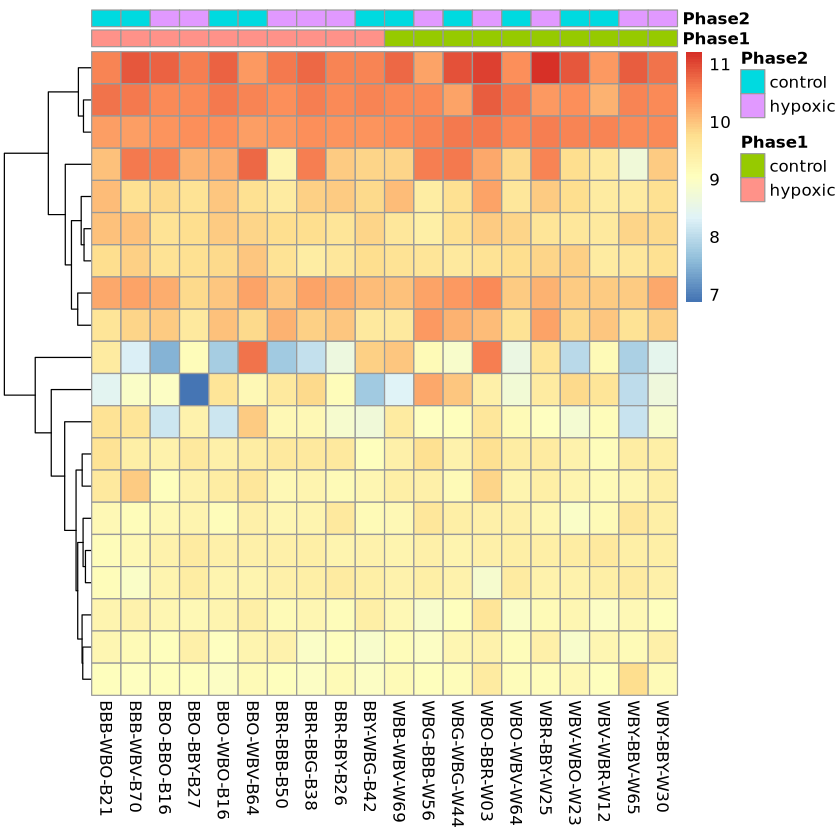

In [51]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("Phase1", "Phase2")])
pheatmap(assay(ntd)[select,], cluster_rows=TRUE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

#### heatmap of the sample-to-sample distances

gives overview of similarities and dissimilarities between samples

code from [DESeq2 vignette](https://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#heatmap-of-the-count-matrix)

In [42]:
vsd

class: DESeqTransform 
dim: 13544 20 
metadata(1): version
assays(1): ''
rownames(13544): LOC111120752 LOC111109452 ... LOC111117115
  LOC111116603
rowData names(30): baseMean baseVar ... maxCooks dispFit
colnames(20): BBB-WBO-B21 BBB-WBV-B70 ... WBY-BBV-W65 WBY-BBY-W30
colData names(4): Phase1 Phase2 treatment sizeFactor

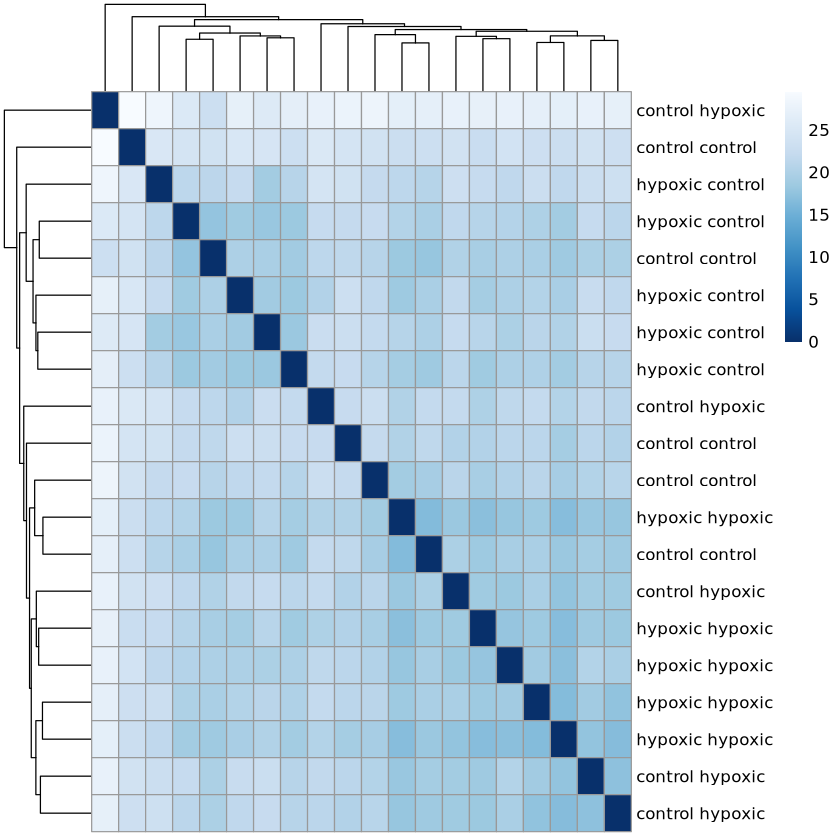

In [44]:
sampleDists <- dist(t(assay(vsd)))

sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$Phase1, vsd$Phase2, sep=" ")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

In [53]:

contrasts_list <- list(
  contrast1 = c("treatment", "hypoxic_control", "control_control"),
  contrast2 = c("treatment", "hypoxic_hypoxic", "hypoxic_control"),
    contrast3 = c("treatment", "hypoxic_control", "control_hypoxic")
)


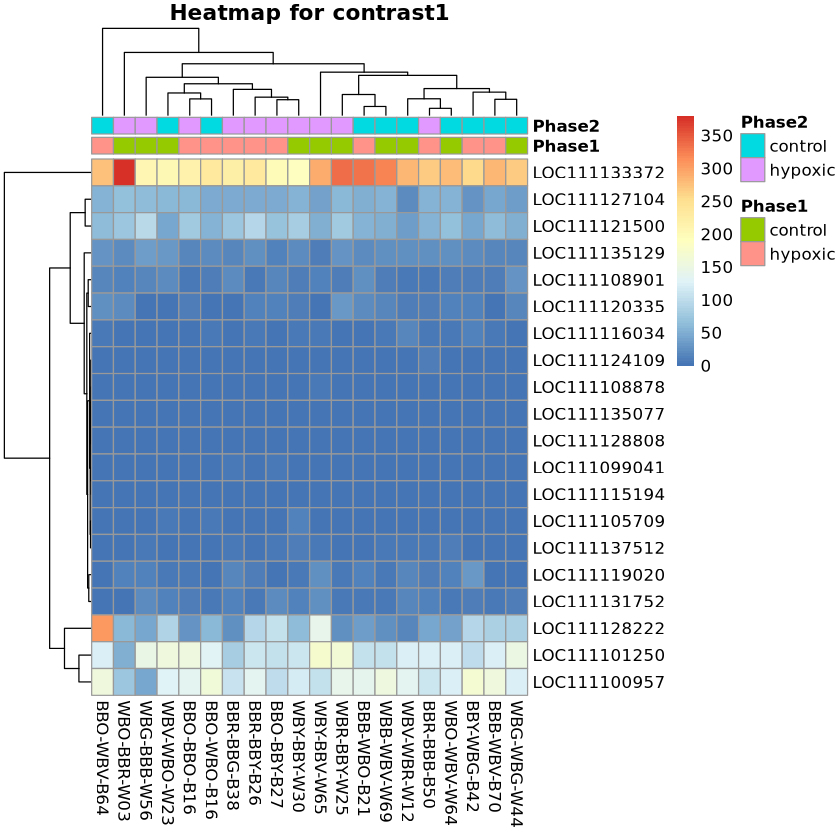

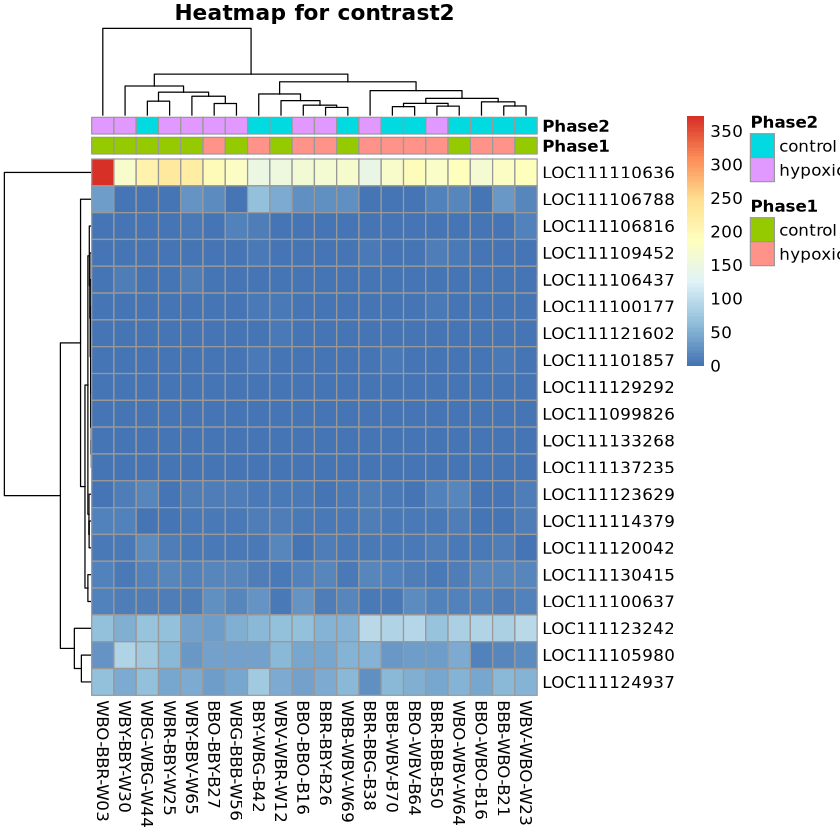

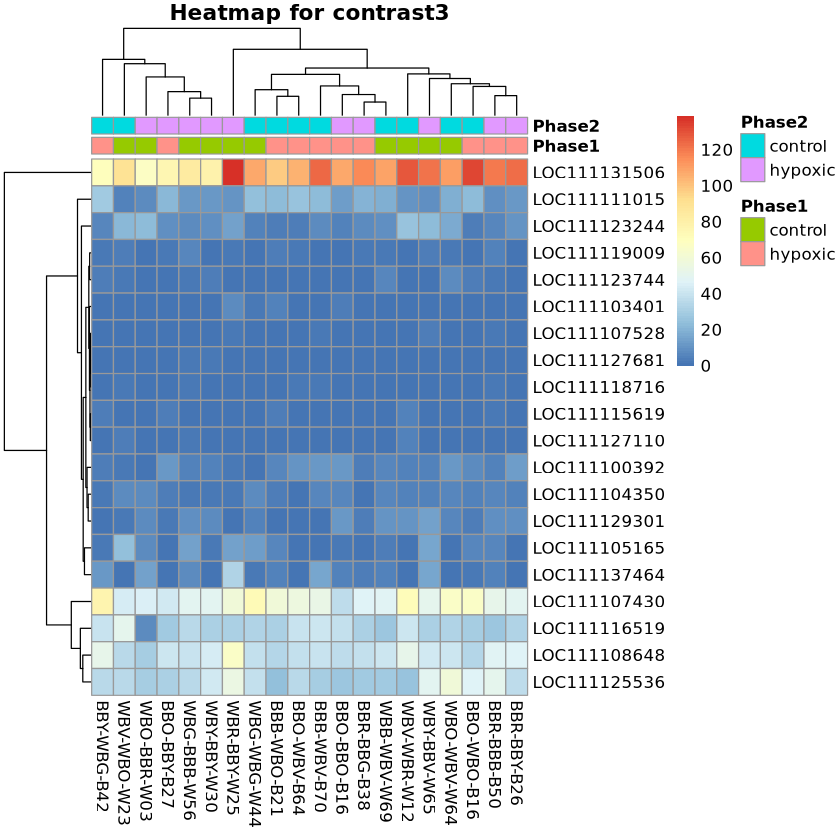

In [54]:
# Loop through each contrast
for (contrast in names(contrasts_list)) {
  # Get results for the contrast
  res <- results(dds, contrast = contrasts_list[[contrast]])
  
  # Filter for significant genes (adjust the threshold as necessary)
  sig_genes <- res[which(res$padj < 0.05), ]
  
  # Select the top N significant genes based on log2 fold change
  top_genes <- head(order(sig_genes$log2FoldChange, decreasing = TRUE), 20)
  
  # Create a counts matrix for the selected genes
  counts_matrix <- counts(dds, normalized = TRUE)[top_genes, ]
  
  # Convert to data frame for pheatmap
  df <- as.data.frame(colData(dds)[, c("Phase1", "Phase2")]) # Adjust this to your metadata
  
  # Create the heatmap
  pheatmap(counts_matrix, 
           cluster_rows = TRUE, 
           show_rownames = TRUE, 
           cluster_cols = TRUE, 
           annotation_col = df, 
           main = paste("Heatmap for", contrast))
}


I'm wondering if I need to pull out only the samples I want to look at when running DESeq2 - instead of only setting the contrast ... 

In [57]:
CH_HC_meta <- filter(meta_filtered, meta_filtered$treatment == "hypoxic_control" | meta_filtered$treatment == "control_hypoxic")
CH_HC_meta

,Phase1,Phase2,treatment
,<chr>,<chr>,<chr>
BBB-WBO-B21,hypoxic,control,hypoxic_control
BBB-WBV-B70,hypoxic,control,hypoxic_control
BBO-WBO-B16,hypoxic,control,hypoxic_control
BBO-WBV-B64,hypoxic,control,hypoxic_control
BBY-WBG-B42,hypoxic,control,hypoxic_control
WBG-BBB-W56,control,hypoxic,control_hypoxic
WBO-BBR-W03,control,hypoxic,control_hypoxic
WBR-BBY-W25,control,hypoxic,control_hypoxic
WBY-BBV-W65,control,hypoxic,control_hypoxic


In [59]:
CH_HC_counts <- counts_filtered[,colnames(counts_filtered) %in% (rownames(CH_HC_meta))]
head(CH_HC_counts)

,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111120752,2,2,2,0,0,1,0,0,0,1
LOC111109452,0,0,1,1,2,1,0,0,1,2
LOC111124802,597,453,502,434,110,455,20,122,289,202
LOC111101273,173,146,171,158,45,127,8,43,87,81
LOC111101250,253,255,327,269,49,261,7,91,254,109
LOC111101262,645,634,647,677,108,485,40,184,387,251


In [60]:

# creating DESeq2 objext from the matrix, with the design = treatment (which has both phase 1 and phase 2 variables)
CH_HC_dds <- DESeqDataSetFromMatrix(countData = CH_HC_counts,
                              colData = CH_HC_meta, 
                              design = ~ treatment)
CH_HC_dds=DESeq(CH_HC_dds)
resultsNames(CH_HC_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"                                   
[2] "treatment_hypoxic_control_vs_control_hypoxic"

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895




out of 13398 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.25 (up)    : 73, 0.54%
LFC < -0.25 (down) : 129, 0.96%
outliers [1]       : 284, 2.1%
low counts [2]     : 4053, 30%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



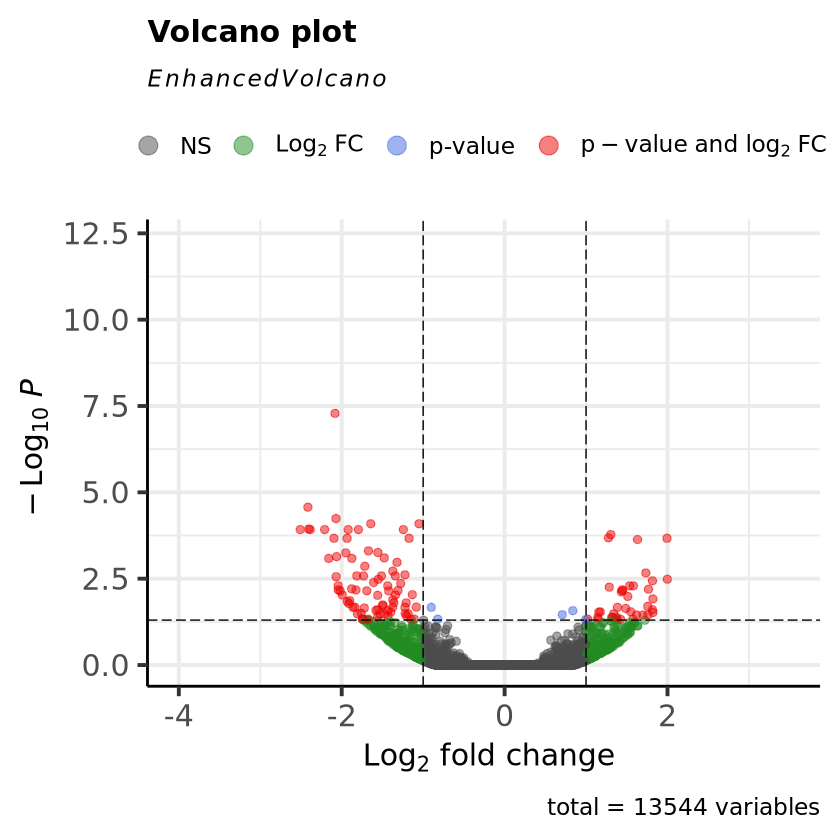

In [61]:
contrast2 <- c("treatment", "hypoxic_control", "control_hypoxic")

# results of contrast1 with lfcThreshold=0.25 and normal shrinkage estimator
CH_HC_ls<-lfcShrink(CH_HC_dds, # dds object
                      contrast = contrast2, # only coef or contrast can be specified
                      type="normal", lfcThreshold=0.25,
                      cooksCutoff=FALSE, independentFiltering=FALSE) # adding stuff to change outliers/padj=NA
summary(CH_HC_ls)

EnhancedVolcano(CH_HC_ls, 
                lab=NA,
                x = 'log2FoldChange',
                y='padj',
                pCutoff=0.05)

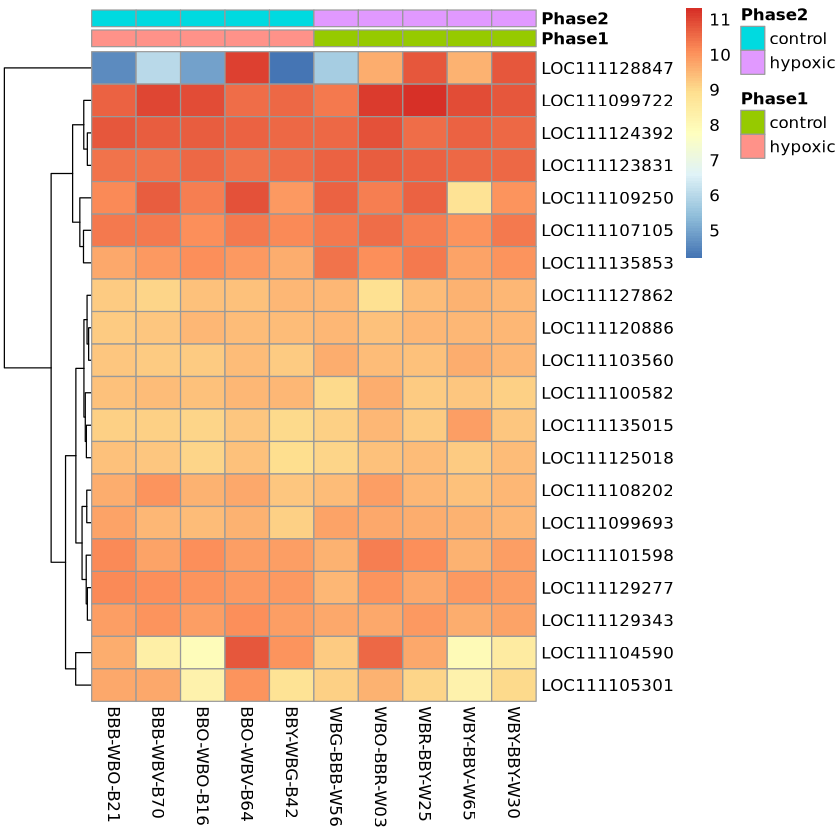

In [63]:
ntd <- normTransform(CH_HC_dds)
select <- order(rowMeans(counts(CH_HC_dds,normalized=TRUE)),
                decreasing=TRUE)[1:20]
df <- as.data.frame(colData(CH_HC_dds)[,c("Phase1", "Phase2")])
pheatmap(assay(ntd)[select,], cluster_rows=TRUE, show_rownames=TRUE,
         cluster_cols=FALSE, annotation_col=df)

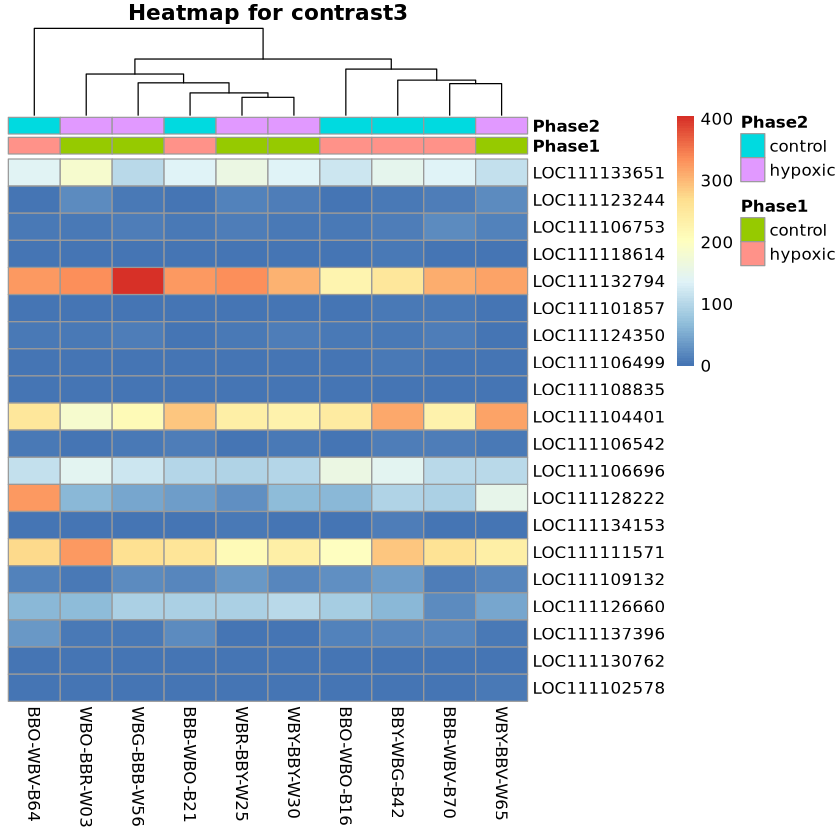

In [71]:
# Get results for the contrast
res <- results(CH_HC_dds, contrast = c("treatment", "hypoxic_control", "control_hypoxic"))
  
# Filter for significant genes (adjust the threshold as necessary)
sig_genes <- res[which(res$padj < 0.05), ]
  
# Select the top N significant genes based on log2 fold change
top_genes <- head(order(sig_genes$log2FoldChange, decreasing = TRUE), 20)
  
# Create a counts matrix for the selected genes
counts_matrix <- counts(CH_HC_dds, normalized = TRUE)[top_genes, ]
  
# Convert to data frame for pheatmap
df <- as.data.frame(colData(CH_HC_dds)[, c("Phase1", "Phase2")]) 
  
# Create the heatmap
pheatmap(counts_matrix, 
         cluster_rows = FALSE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = df, 
         main = paste("Heatmap for", contrast))

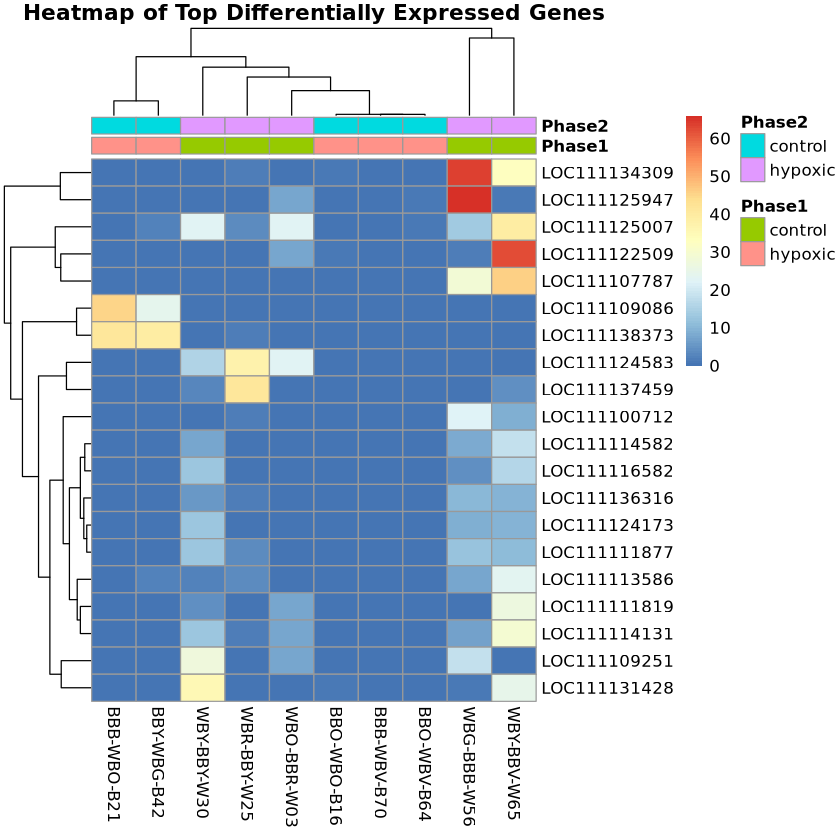

In [79]:
# Get results for the contrast
res <- results(CH_HC_dds, contrast = c("treatment", "hypoxic_control", "control_hypoxic"))

# Filter for significant genes
sig_genes <- res[which(res$padj < 0.05 & abs(res$log2FoldChange) > 0.25), ]

# Order by absolute log2 fold change
top_genes <- sig_genes[order(abs(sig_genes$log2FoldChange), decreasing = TRUE), ]

# Select the top N genes (e.g., top 20)
top_genes <- head(top_genes, 20)

# Create a counts matrix for the selected genes
counts_matrix <- counts(CH_HC_dds, normalized = TRUE)[rownames(top_genes), ]

# Create the heatmap
pheatmap(counts_matrix, 
         cluster_rows = TRUE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = df[sample_order, ],  # Ensure correct ordering
         main = "Heatmap of Top Differentially Expressed Genes")



In [ ]:
top_genes_df <- as.data.frame(top_genes)
top_genes_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC111109251,5.345547,-6.527442,1.8846304,-3.463513,5.331707e-04,1.401004e-02
LOC111124583,7.580974,-6.386841,1.7611538,-3.626510,2.872782e-04,9.156851e-03
LOC111111819,3.875504,-6.056625,2.0124867,-3.009523,2.616583e-03,3.869332e-02
LOC111114582,3.408806,-5.957949,1.7243653,-3.455155,5.499775e-04,1.431899e-02
LOC111122509,7.246872,-5.851303,1.8633067,-3.140279,1.687869e-03,2.945695e-02
LOC111124173,3.148480,-5.845500,1.7141112,-3.410222,6.490999e-04,1.580609e-02
LOC111107787,7.512600,-5.834437,1.7430289,-3.347298,8.160347e-04,1.820325e-02
LOC111109086,7.017111,5.684781,1.9101050,2.976162,2.918811e-03,4.092246e-02
LOC111113586,3.917193,-5.516338,1.5181593,-3.633570,2.795269e-04,9.042770e-03


In [91]:
counts_matrix <- CH_HC_counts[rownames(CH_HC_counts) %in% rownames(top_genes_df),]
counts_matrix

,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111111819,0,0,0,0,0,0,1,0,37,4
LOC111124173,0,0,0,0,0,15,0,0,13,12
LOC111107787,0,1,0,1,0,48,0,0,63,0
LOC111109086,101,1,1,0,11,0,0,0,0,0
LOC111122509,0,0,2,0,0,3,1,0,86,0
LOC111125007,1,0,1,2,1,23,3,2,54,21
LOC111124583,0,1,0,0,0,0,3,19,0,14
LOC111125947,0,0,1,2,0,111,1,0,1,0
LOC111131428,1,0,2,0,0,2,0,0,34,32


the above df shows the actual counts matrix for the top DMGs - adjusted pvalue < 0.05, and then ordered by largest absolute log fold change 

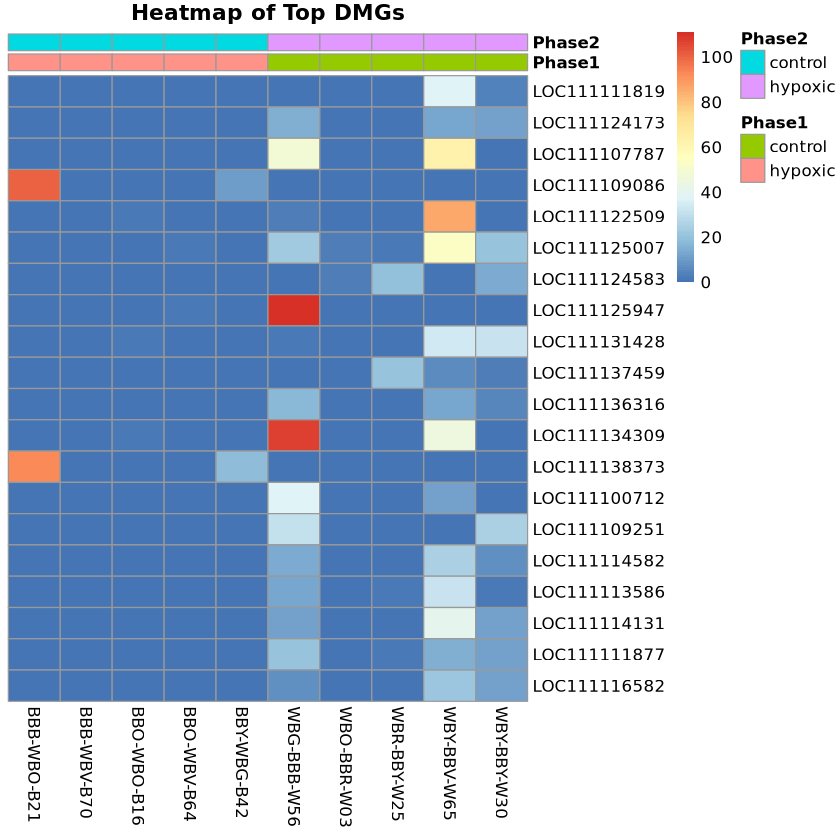

In [94]:
# Create the heatmap
pheatmap(counts_matrix, 
         cluster_rows = FALSE, 
         show_rownames = TRUE, 
         cluster_cols = FALSE, 
         annotation_col = df[sample_order, ],  # Ensure correct ordering
         main = "Heatmap of Top DMGs")